In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df <- read.csv('2018_JP_VP_Level4.csv')

In [ ]:
# see number of columns:
ncol(df)
nrow(df)

In [ ]:
# see number of NA values.
sum(is.na(df))

In [ ]:
df <- na.omit(df)

In [ ]:
ncol(df)
nrow(df)

In [ ]:
# see number of NA values.
sum(is.na(df))

In [ ]:
head(df)

In [ ]:
cols <- colnames(df)
cols

## Create a Dataframe of correlations between each numerical variables.

In [ ]:

colx <- c()
coly <- c()
correlation <- c()

for(i in 3:(length(cols)-1)){
  for(j in (i+1):length(cols)){
    colx <- append(colx, cols[i])
    coly <- append(coly, cols[j])
    correlation <- append(correlation, cor(df[, i], df[, j]))
  }
}

correlations <- data.frame(colx, coly, correlation)

### Let's look into the correlations:

In [ ]:

correlations

### Variables having positive correlations in descending order.

In [ ]:
correlations |> filter(correlation>0)|>arrange(desc(correlation))

Warning message:
“Removed 52207 rows containing missing values (`geom_point()`).”


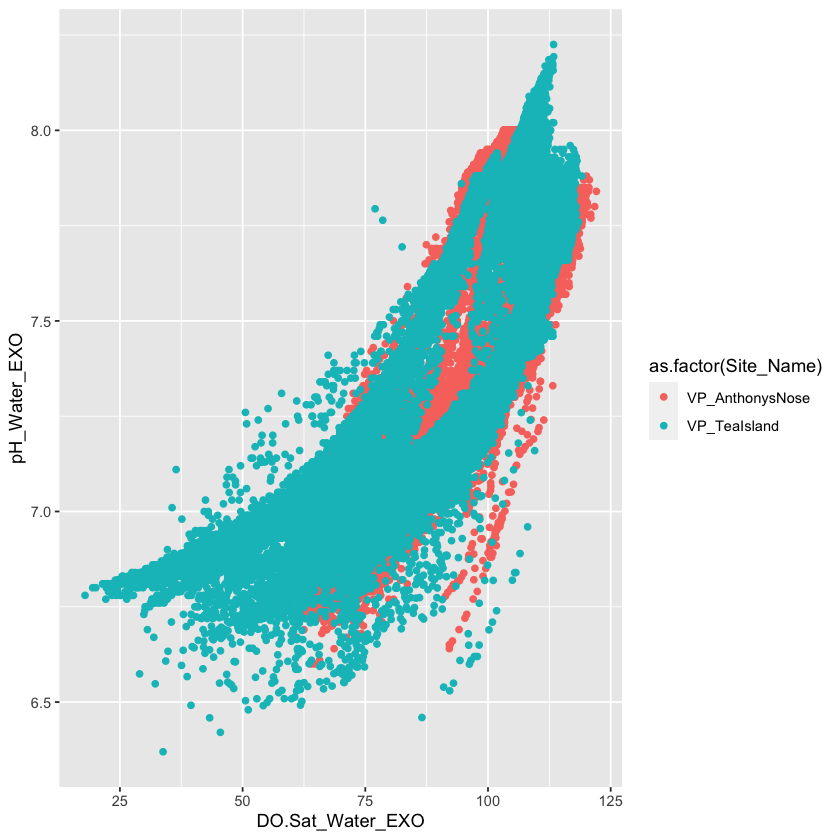

In [9]:
# DO.Sat_Water_EXO vs pH_Water_EXO
ggplot(df, mapping=aes(x=DO.Sat_Water_EXO, y=pH_Water_EXO, color=as.factor(Site_Name)))+
  geom_point()

Warning message:
“Removed 46675 rows containing missing values (`geom_point()`).”


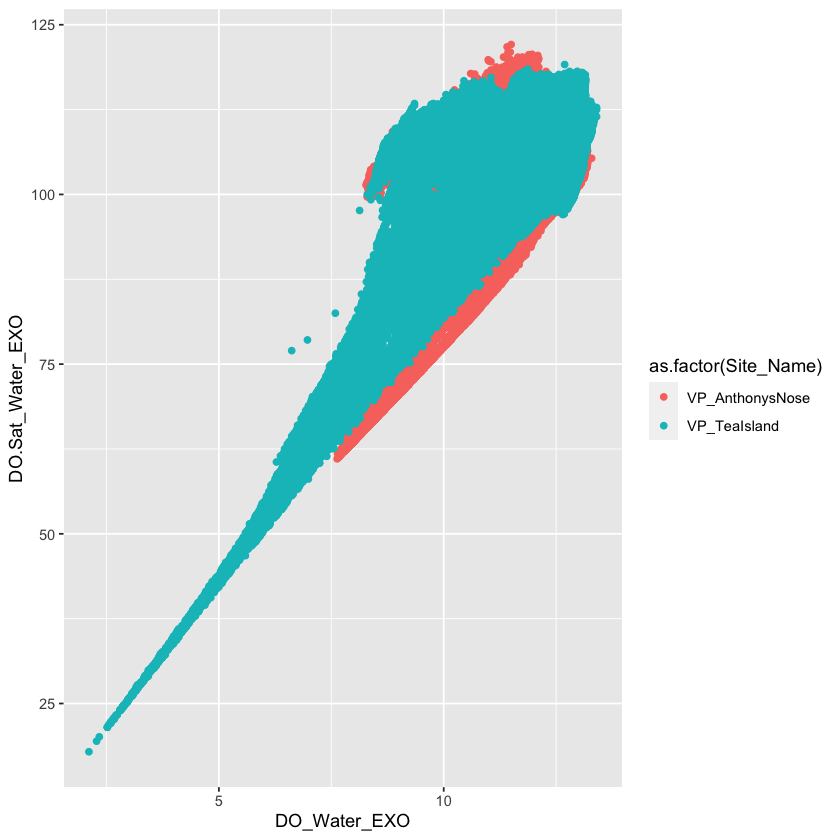

In [10]:
# DO_Water_EXO vs	DO.Sat_Water_EXO
ggplot(df, aes(DO_Water_EXO,	DO.Sat_Water_EXO, color=as.factor(Site_Name)))+
  geom_point()

Warning message:
“Removed 52207 rows containing missing values (`geom_point()`).”


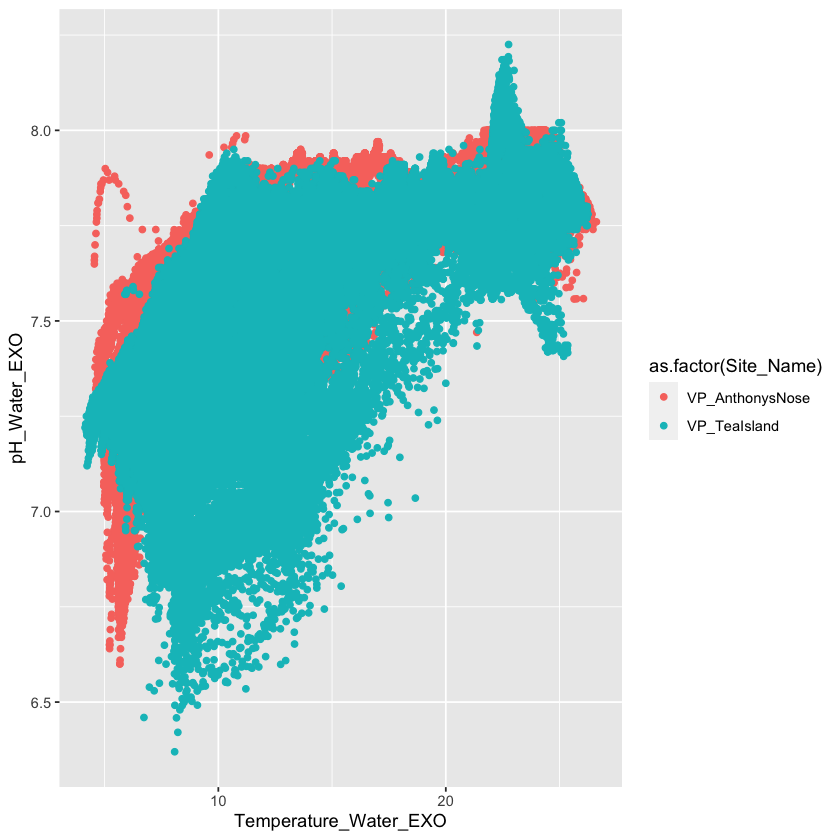

In [11]:
# Temperature_Water_EXO	vs pH_Water_EXO
ggplot(df, aes(Temperature_Water_EXO,	pH_Water_EXO, color=as.factor(Site_Name)))+
  geom_point()

## Turbidity

Turbidity is caused by particles suspended or dissolved in water that scatter light making the water appear cloudy or murky. Particulate matter can include sediment - especially clay and silt, fine **organic** and **inorganic** matter, soluble colored organic compounds, **algae**, and other microscopic organisms.